## Analysing the stock price of BAJ financial group given various output

## Information:

This project is a kaggle compettion 

In this project we analyse BAJ financial data: open price of the stock market, closing price, highest and lowest price during on specific, the volume... to determine the average price of weighted volume of the stock market with respect to the given features.

### Data Description

Columns:

    Date	
    Symbol	
    Series	
    Prev 
    Close	
    Open	
    High	
    Low	
    Last	
    Close	
    VWAP	
    Volume	
    Turnover	
    Trades	
    Deliverable 
    Volume	
    %Deliverble

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv('/home/daryl-loyck/Documents/datascience-projects/Stock Price Analysis/bajaj_stock_data.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


### Exploratory Data Analysis (EDA)

In [3]:
df.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

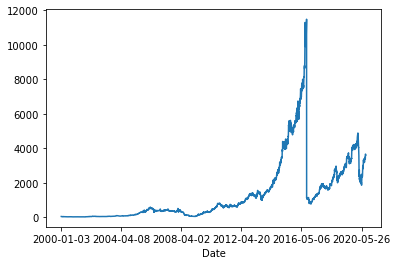

In [4]:
df['VWAP'].plot()

In [5]:
df.shape

(5070, 14)

In [6]:
# total number of nan values per feature
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [9]:
df.shape

(2291, 14)

In [10]:
data = df.copy()

In [11]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [12]:
# Total number of columns in the dataset
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [13]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2291 entries, 2011-06-01 to 2020-08-31
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              2291 non-null   object 
 1   Series              2291 non-null   object 
 2   Prev Close          2291 non-null   float64
 3   Open                2291 non-null   float64
 4   High                2291 non-null   float64
 5   Low                 2291 non-null   float64
 6   Last                2291 non-null   float64
 7   Close               2291 non-null   float64
 8   VWAP                2291 non-null   float64
 9   Volume              2291 non-null   int64  
 10  Turnover            2291 non-null   float64
 11  Trades              2291 non-null   float64
 12  Deliverable Volume  2291 non-null   float64
 13  %Deliverble         2291 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 268.5+ KB


In [14]:
# To know more about the dataset
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,2291.000000,2291.000000,2291.000000,2291.00000,2291.000000,2291.000000,2291.000000,2.291000e+03,2.291000e+03,2291.000000,2.291000e+03,2291.000000
mean,2628.087014,2629.653732,2671.476102,2585.36388,2629.636120,2629.340223,2629.579742,1.096640e+06,2.856621e+14,47105.843736,2.715929e+05,0.527614
std,1953.461940,1952.462470,1981.064905,1922.17404,1953.298747,1953.091924,1952.376483,2.553511e+06,6.988354e+14,101514.259444,4.585916e+05,0.230515
min,566.100000,560.000000,572.000000,553.80000,566.000000,566.100000,566.550000,1.030000e+02,8.871925e+09,21.000000,5.000000e+01,0.057500
25%,1250.700000,1254.050000,1274.925000,1236.00000,1253.450000,1251.475000,1254.905000,2.178350e+04,3.590858e+12,1519.500000,1.500100e+04,0.338150
50%,1919.950000,1924.100000,1946.000000,1898.60000,1922.000000,1920.450000,1920.540000,8.762700e+04,3.951148e+13,9603.000000,5.778100e+04,0.535700
75%,3458.275000,3464.525000,3518.900000,3404.22500,3460.000000,3459.275000,3462.135000,1.101374e+06,2.510239e+14,48836.000000,3.541870e+05,0.715050
max,11393.300000,11300.000000,11770.000000,11294.00000,11386.700000,11393.300000,11490.730000,2.596010e+07,8.787972e+15,979111.000000,3.690656e+06,0.990000


In [15]:
lag_features = ['High', 'Low', 'Volume', 'Turnover', 'Trades']
window1 = 3
window2 = 7

In [16]:
for feature in lag_features:
    data[feature+'rolling_mean_3'] = data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7'] = data[feature].rolling(window=window2).mean()

In [17]:
for feature in lag_features:
    data[feature+'rolling_std_3'] = data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7'] = data[feature].rolling(window=window2).std()

In [18]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [19]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

we obtain averages in order to predict average volume price with respect data averages

In [20]:
data.shape

(2291, 34)

In [21]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [22]:
data.dropna(inplace=True)

In [23]:
ind_features = ['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [24]:
training_data = data[0: 1800]
test_data = data[1800:]

In [25]:
from pmdarima import auto_arima

import warnings 
warnings.filterwarnings('ignore')

In [26]:
model = auto_arima(y=training_data['VWAP'], exogenous=training_data[ind_features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.527, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.217, Time=0.68 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.340, Time=0.70 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.312, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.227, Time=0.82 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 4.642 seconds


In [27]:
 model.fit(training_data['VWAP'], training_data[ind_features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [28]:
forcast = model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [29]:
test_data['Forcast_ARIMA'] = forcast

<AxesSubplot:xlabel='Date'>

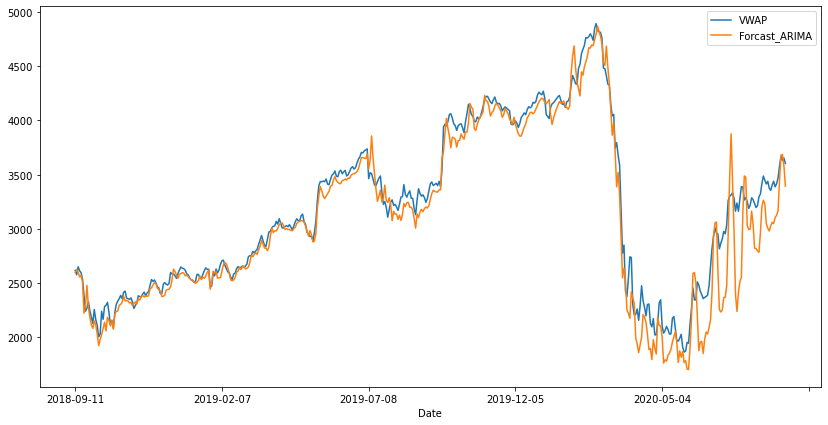

In [30]:
test_data[['VWAP', 'Forcast_ARIMA']].plot(figsize=(14, 7))

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

np.sqrt(mean_squared_error(test_data['VWAP'], test_data['Forcast_ARIMA']))

187.73819510151517

In [32]:
mean_absolute_error(test_data['VWAP'], test_data['Forcast_ARIMA'])

124.6297762645439

## Conclusion

This project make use of time series model application